<h1 style="color: blue; text-align: center; font-size: 25px;"><b>MACHINE LEARNING ASSIGNMENT 3</b></h1>
<h2 style="color: blue; text-align: center; font-size: 25px;"><b>Regression</b></h2>

#### <font color='blue'>Objective:</font>
 The objective of this assignment is to evaluate your understanding of regression techniques in supervised learning by applying them to a real-world dataset.


### <font color='blue'>Dataset:</font>
Use the California Housing dataset available in the sklearn library. This dataset contains information about various features of houses in California and their respective median prices.

#### <font  color = 'blue'>1. Loading and Preprocessing (2 marks):</font>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [6]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
# Extract features (X) and target (y)
X = california_housing.data  # Feature matrix
y = california_housing.target  # Target vector
data=pd.concat([X, y.rename("MedHouseValue")], axis=1)

In [7]:
df=data.copy()

In [8]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


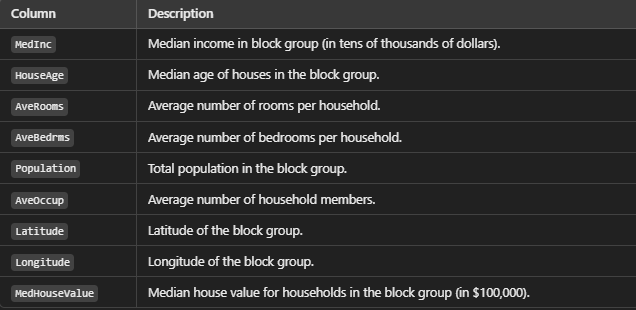

In [9]:
from IPython.display import Image, display

# Display a local image
display(Image(filename="new.png"))

<font color=blue>Handle missing values (if any) and perform necessary feature scaling (e.g., standardization).

In [11]:
df.shape

(20640, 9)

In [12]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

No null values.

<font color=blue>Checking if there is any duplicates.

In [15]:
df.duplicated().sum()

0

No duplicates.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [18]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number'])

# View the numerical columns
print(numeric_columns.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')


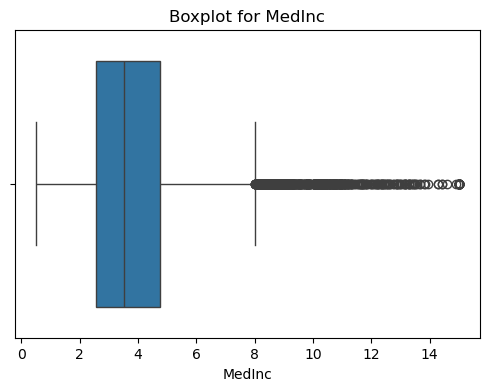

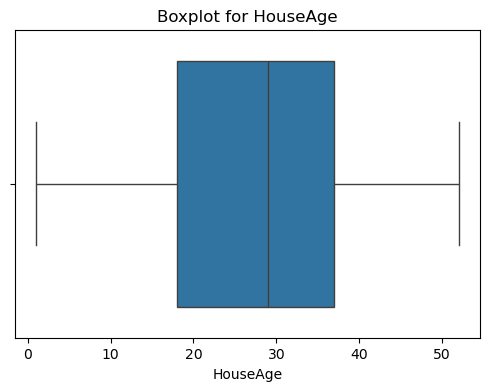

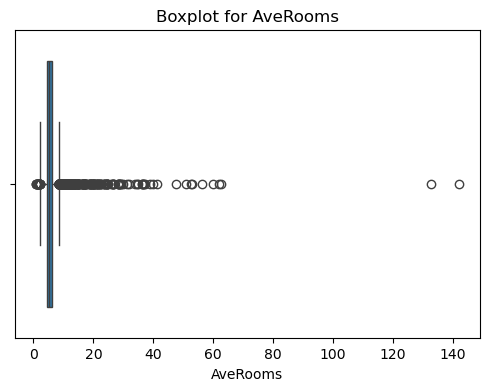

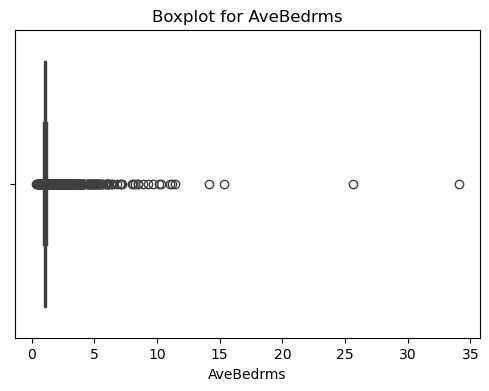

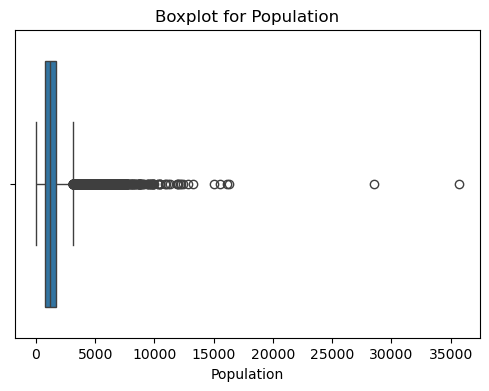

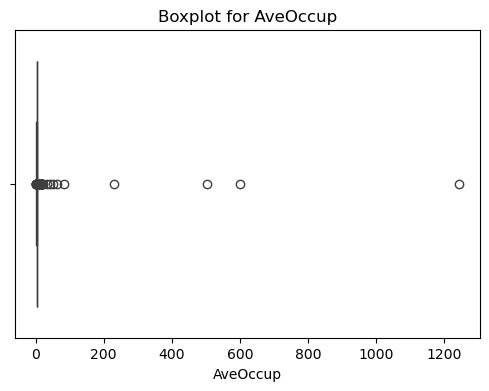

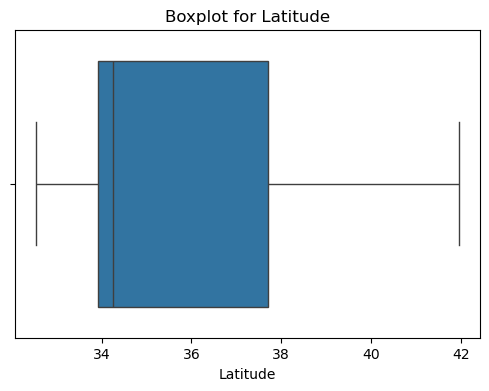

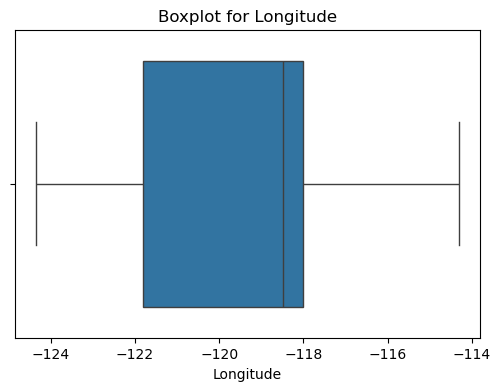

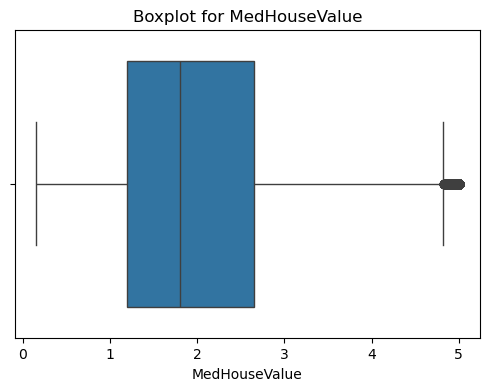

In [20]:
# Boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

#### Finding Outliers and Removing

In [22]:
def filter(numeric_columns) :
    for col in numeric_columns:
        Q1 = df["AveBedrms"].quantile(0.25)
        Q3 = df["AveBedrms"].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data
        df_cleaned = df[(df["AveBedrms"] >= lower_bound) & (df["AveBedrms"] <= upper_bound)]
        return  df_cleaned

In [23]:
df1=filter(numeric_columns)

#### Finding skewness and transforming

In [25]:
df1.skew()

MedInc             1.616225
HouseAge           0.035212
AveRooms           0.328424
AveBedrms          0.247345
Population         5.089937
AveOccup         124.115893
Latitude           0.470827
Longitude         -0.324951
MedHouseValue      0.959793
dtype: float64

In [26]:
df1["Population_cbrt"] = np.cbrt(df["Population"])  # Use log1p to handle zero values
df1["MedHouseValue_sqrt"] = np.sqrt(df["MedHouseValue"])
df1["MedInc_sqrt"] = np.sqrt(df["MedInc"])

In [27]:
df1.skew()

MedInc                  1.616225
HouseAge                0.035212
AveRooms                0.328424
AveBedrms               0.247345
Population              5.089937
AveOccup              124.115893
Latitude                0.470827
Longitude              -0.324951
MedHouseValue           0.959793
Population_cbrt         0.740182
MedHouseValue_sqrt      0.422833
MedInc_sqrt             0.686953
dtype: float64

In [28]:
df1.drop(["Population", "MedHouseValue", "MedInc"], axis=1, inplace=True)

In [29]:
df1.skew()

HouseAge                0.035212
AveRooms                0.328424
AveBedrms               0.247345
AveOccup              124.115893
Latitude                0.470827
Longitude              -0.324951
Population_cbrt         0.740182
MedHouseValue_sqrt      0.422833
MedInc_sqrt             0.686953
dtype: float64

In [30]:
df1.drop(["AveOccup"], axis=1, inplace=True)

In [31]:
df1.head()

,HouseAge,AveRooms,AveBedrms,Latitude,Longitude,Population_cbrt,MedHouseValue_sqrt,MedInc_sqrt
0,41.0,6.984127,1.023810,37.88,-122.23,6.854124,2.127440,2.885342
1,21.0,6.238137,0.971880,37.86,-122.22,13.390518,1.893410,2.881215
2,52.0,8.288136,1.073446,37.85,-122.24,7.915783,1.876433,2.693956
3,52.0,5.817352,1.073059,37.85,-122.25,8.232746,1.847431,2.375521
4,52.0,6.281853,1.081081,37.85,-122.25,8.267029,1.849865,1.961173


### Check for Outliers Using Boxplots
Boxplots are ideal for spotting outliers in each feature.

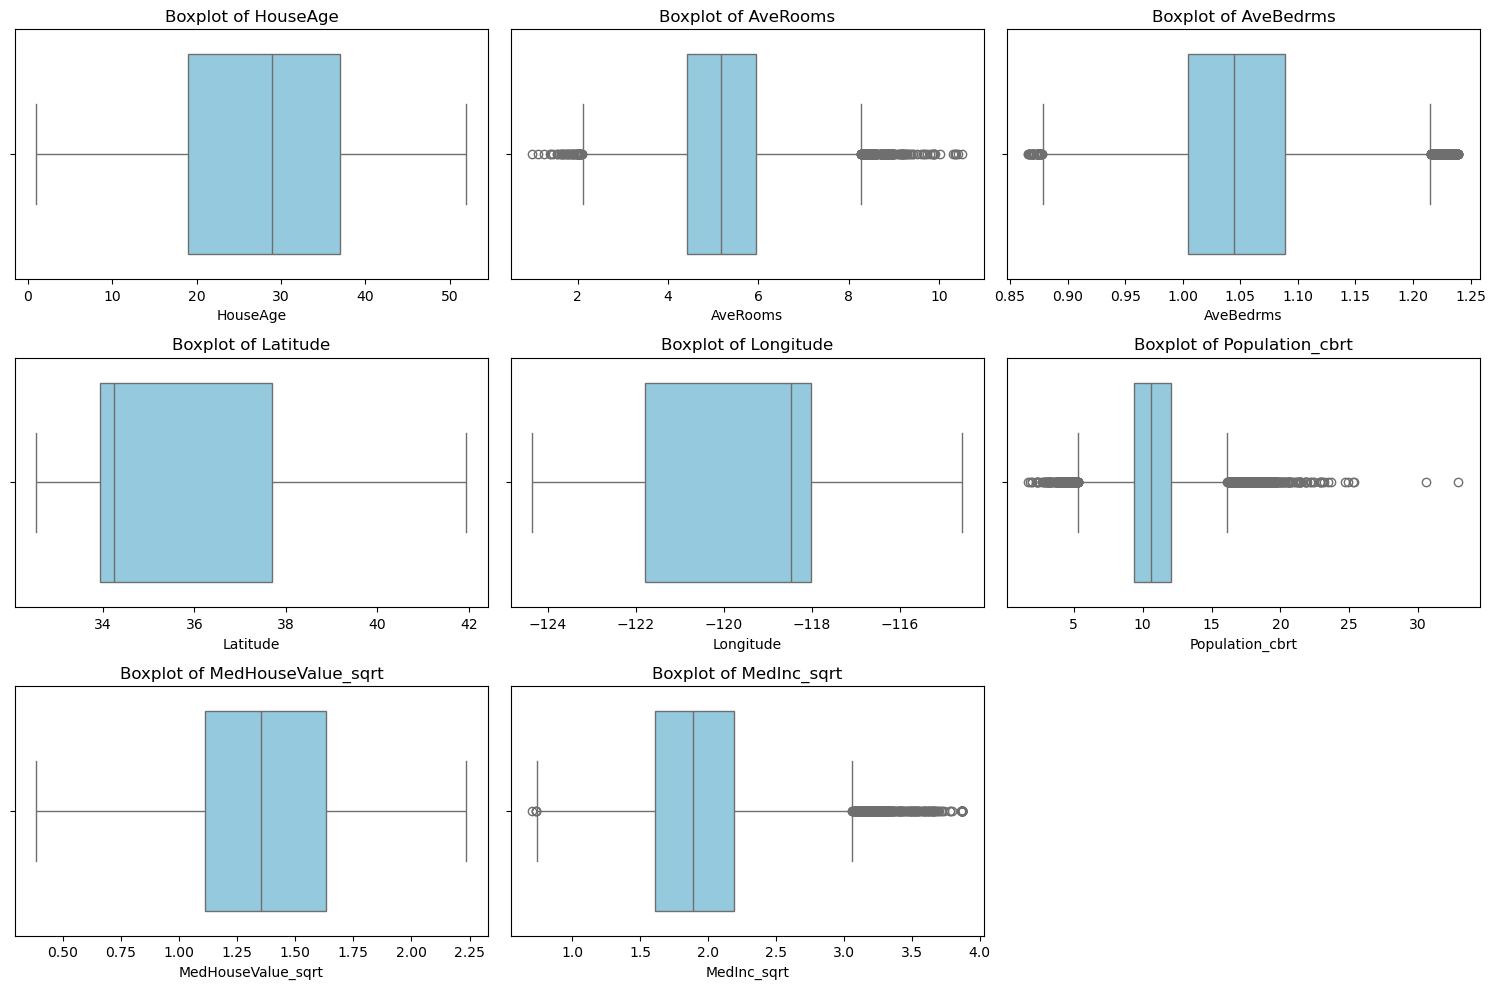

In [33]:
# Plot boxplots for each column
columns = ["HouseAge", "AveRooms", "AveBedrms", "Latitude", "Longitude", 
           "Population_cbrt", "MedHouseValue_sqrt", "MedInc_sqrt"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df1[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    
plt.tight_layout()
plt.show()

### Histogram for checking skewness and normalisation.

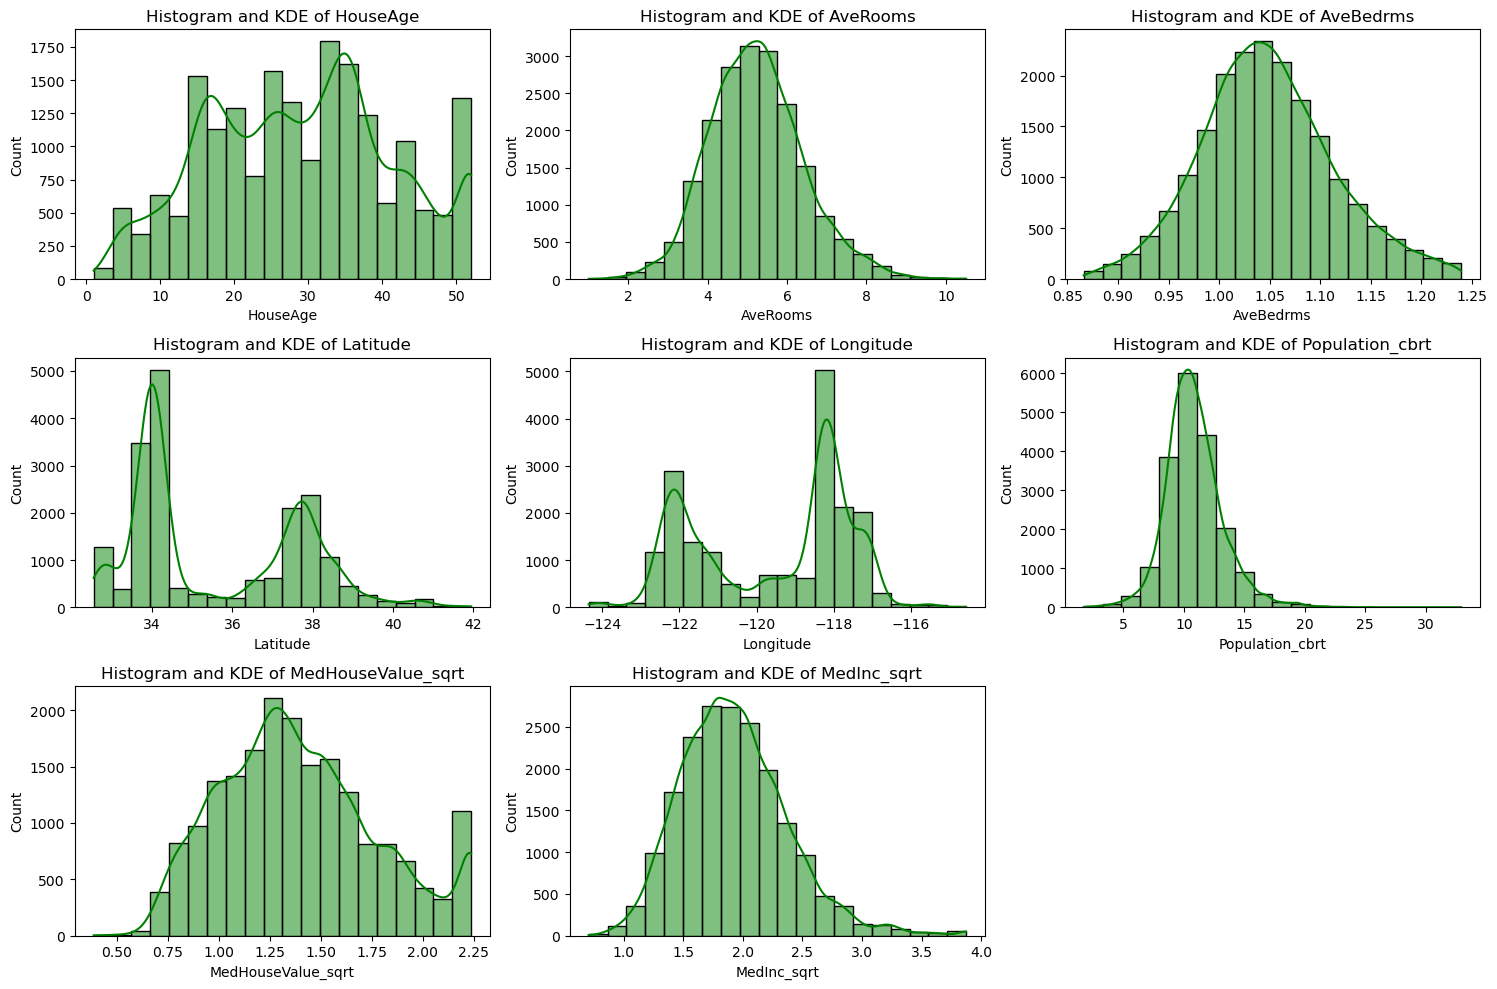

In [34]:
# Plot histograms with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df1[col], kde=True, color='green', bins=20)
    plt.title(f"Histogram and KDE of {col}")
    
plt.tight_layout()
plt.show()


#### Box-Cox transformation : 
It is a statistical technique used to stabilize variance and make data more closely approximate a normal distribution by applying a power transformation.

In [35]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation (requires positive values)
df1["Population_boxcox"], _ = boxcox(df1["Population_cbrt"] + 1)  # Add 1 to handle zeros
df1["MedInc_boxcox"], _ = boxcox(df1["MedInc_sqrt"] + 1)

In [36]:
df1.drop(["MedInc_sqrt", "Population_cbrt"], axis=1, inplace=True)
df1.skew()

HouseAge              0.035212
AveRooms              0.328424
AveBedrms             0.247345
Latitude              0.470827
Longitude            -0.324951
MedHouseValue_sqrt    0.422833
Population_boxcox     0.055468
MedInc_boxcox        -0.002660
dtype: float64

<font color=blue size=3>The Outliers are first detected and removed, then skewness is also detected and transformed. Now the dataset is moderately skewed and preprocessed.

In [38]:
df1.head()

,HouseAge,AveRooms,AveBedrms,Latitude,Longitude,MedHouseValue_sqrt,Population_boxcox,MedInc_boxcox
0,41.0,6.984127,1.023810,37.88,-122.23,2.127440,3.222595,1.092841
1,21.0,6.238137,0.971880,37.86,-122.22,1.893410,4.806224,1.092163
2,52.0,8.288136,1.073446,37.85,-122.24,1.876433,3.522767,1.060366
3,52.0,5.817352,1.073059,37.85,-122.25,1.847431,3.608224,1.001041
4,52.0,6.281853,1.081081,37.85,-122.25,1.849865,3.617362,0.911632


#### Feature Scaling:

Linear regression is not sensitive to feature scaling, as it doesn't use distance-based computations. However, scaling can still be useful for interpretability and regularization (if using Ridge or Lasso regression).

### Linear Regression model

* Definition: Models the relationship between independent variables and a continuous target variable using a straight line.
* Objective: Minimizes the differences between observed and predicted values using the least squares method.
* Key Features: Simple to implement, easy to interpret, and works well with linear relationships.
* Limitations: Struggles with nonlinear relationships and multicollinearity among predictors.
* Extensions: Regularized versions like Ridge and Lasso Regression address some limitations.

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assume X and y are your features and target variables

# Split data into X (features) and y (target variable)
X = df1[['HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude','Population_boxcox','MedInc_boxcox']]
y = df1['MedHouseValue_sqrt']  # The target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SelectKBest with f_regression to select top 5 features on the training data
select_k_best = SelectKBest(score_func=f_regression, k=5)
X_train_selected = select_k_best.fit_transform(X_train, y_train)

# Now you can fit your model on the selected features from the training set
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [41]:
# You can then use the model to make predictions on the test set
X_test_selected = select_k_best.transform(X_test)  # Apply the same feature selection to the test set
y_pred = model.predict(X_test_selected)

In [42]:
# Evaluate model performance (e.g., using R^2 score)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.06892124381603329
R^2 Score: 0.5427343993288758


<font color=green size=3>For Regression: Use metrics like MSE, MAE, and R^2.


### Decision Tree Regressor model

* Definition: A non-linear model that predicts continuous target variables by splitting data into regions based on decision rules derived from feature values.
* Objective: Divides the dataset into smaller subsets, creating a tree-like structure where each split minimizes error (e.g., mean squared error or mean absolute error).
* Key Features: Handles both linear and non-linear relationships, requires minimal data preprocessing, and is easy to interpret.
* Limitations: Prone to overfitting, especially with deep trees, and sensitive to small data variations.
* Extensions: Techniques like pruning, ensemble methods (Random Forest, Gradient Boosting) improve performance and reduce overfitting.

In [76]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train_selected, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [78]:
# You can then use the model to make predictions on the test set
X_test_selected = select_k_best.transform(X_test)  # Apply the same feature selection to the test set
y_pred = model.predict(X_test_selected)

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.061256153967021006
R^2 Score: 0.5935892841211808


### Random Forest Regressor

* Definition: An ensemble learning method that combines multiple decision trees to predict continuous target variables. It averages their outputs to improve accuracy and reduce overfitting.
* Objective: Enhances the stability and predictive power of decision trees by aggregating results from multiple random subsets of data and features.
* Key Features: Handles both linear and non-linear relationships, robust to outliers, reduces overfitting compared to single decision trees, and works well with large datasets.
* Limitations: Can be computationally expensive for large datasets and may become less interpretable due to the ensemble structure.
* Extensions: Often used as a base model in advanced techniques like Gradient Boosting and feature selection.

In [87]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor with desired hyperparameters
model = RandomForestRegressor(max_depth=5, random_state=42)

# Train the model with the training dataset
model.fit(X_train_selected, y_train)


RandomForestRegressor(max_depth=5, random_state=42)

In [89]:
# You can then use the model to make predictions on the test set
X_test_selected = select_k_best.transform(X_test)  # Apply the same feature selection to the test set
y_pred = model.predict(X_test_selected)

In [91]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0564419393138401
R^2 Score: 0.6255297227038401


### Gradient Boosting Regressor


* Definition: An ensemble learning method that builds models sequentially, where each new model corrects the errors of the previous one, optimizing predictions for continuous target variables.
* Objective: Minimizes a loss function (e.g., mean squared error) by combining weak learners (typically decision trees) into a strong predictive model.
* Key Features: Handles both linear and non-linear relationships, offers high accuracy, and allows customization through various loss functions.
* Limitations: Can be computationally expensive, sensitive to hyperparameters, and prone to overfitting if not properly tuned.
* Extensions: Variants like XGBoost, LightGBM, and CatBoost improve efficiency and scalability while maintaining performance.

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting Regressor with desired hyperparameters
model = GradientBoostingRegressor(max_depth=5, random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model with the training dataset
model.fit(X_train_selected, y_train)


GradientBoostingRegressor(max_depth=5, random_state=42)

In [96]:
# You can then use the model to make predictions on the test set
X_test_selected = select_k_best.transform(X_test)  # Apply the same feature selection to the test set
y_pred = model.predict(X_test_selected)

In [98]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.04505607126630215
R^2 Score: 0.7010705212102715


### Support Vector Regressor (SVR)

* Definition: A regression algorithm based on Support Vector Machines (SVM) that predicts continuous target variables by finding the best-fit hyperplane within a margin of tolerance.
* Objective: Minimizes prediction error while maintaining a balance between model complexity and prediction accuracy using a specified margin (epsilon).
* Key Features: Effective for small- to medium-sized datasets, can model non-linear relationships with kernel functions, and is robust to outliers due to the margin-based approach.
* Limitations: Computationally intensive for large datasets, sensitive to hyperparameters like kernel type, epsilon, and regularization, and can struggle with noisy data.
* Extensions: Kernel tricks (e.g., polynomial, RBF) enable SVR to handle complex, non-linear relationships.

In [114]:
from sklearn.svm import SVR

# Instantiate the SVR model with desired hyperparameters
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [110]:
# Example of consistent feature selection
selector = SelectKBest(f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [120]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both datasets
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)  # Ensure consistent feature set


# Train the model on scaled data
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train_scaled, y_train)


SVR()

In [122]:
# You can then use the model to make predictions on the test set
X_test_selected = select_k_best.transform(X_test)  # Apply the same feature selection to the test set
y_pred = model.predict(X_test_selected)

In [124]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.15154443789626484
R^2 Score: -0.0054383029994438115


### Evaluating Which model is best.

In [127]:
# Example: Store metrics for each model
results = [
    {"Model": "Linear Regression", "MSE": 0.06892124381603329, "R2": 0.5427343993288758},
    {"Model": "Random Forest", "MSE": 0.0564419393138401, "R2":  0.6255297227038401},
    {"Model": "Gradient Boosting Regressor", "MSE": 0.04505607126630215,"R2": 0.7010705212102715},
    {"Model": "SVR", "MSE": 0.15154443789626484, "R2": -0.0054383029994438115},
    {"Model": "Decision Tree Regressor model", "MSE": 0.061256153967021006, "R2": 0.5935892841211808}
]

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Sort by MSE (or any preferred metric)
best_models = results_df.sort_values(by="MSE", ascending=True)
print(best_models)

                           Model       MSE        R2
2    Gradient Boosting Regressor  0.045056  0.701071
1                  Random Forest  0.056442  0.625530
4  Decision Tree Regressor model  0.061256  0.593589
0              Linear Regression  0.068921  0.542734
3                            SVR  0.151544 -0.005438


### Best Model Selection
<font size=3>Based on the results:<br>

Gradient Boosting Regressor is the best model because it has:<br>
The lowest MSE (indicating minimal error).<br>
The highest R² (explaining 70.1% of variance in the target variable).<br></font>

### Worst-Performing Algorithm: Support Vector Regressor (SVR)
##### Reasoning:
* High Error: SVR has the highest Mean Squared Error (MSE) at 0.151544, indicating that it produces the largest prediction errors among all models.
* Negative R²: The R² score is -0.005438, meaning the model performs worse than a baseline model that always predicts the mean target value.
* Inability to Capture Relationships: SVR may struggle with the dataset if:
    * The relationships between variables are too complex for the selected kernel.
    * Hyperparameters like epsilon or C are not well-tuned.
    * The dataset size or noise level exceeds SVR's capabilities.
* Computational Challenges: SVR can be computationally expensive, especially with larger datasets, making it less efficient compared to ensemble models like Gradient Boosting or Random Forest.

### Conclusion:
SVR is the worst-performing model for this dataset, likely due to poor handling of the underlying data relationships or suboptimal hyperparameter choices. Models like Gradient Boosting or Random Forest are better suited in this case.